In [1]:
import numpy as np
import imageio
import scipy as sp
from scipy import signal
from scipy.misc import toimage
import matplotlib.pyplot as plt

In [2]:
maxIter = 100

N = 100

In [3]:
D = 0.75
A = -0.3
Kr = 0.03
Ktheta = 0.2
Km = 1.0
B = 0.0001
C = 10.0
deltax = 1
deltay = 1
deltat = 0.25

In [4]:
alpha = D*deltat/deltax**2
beta = D*deltat/deltay**2
gamma = 1 + 2*alpha + 2*beta

In [5]:
k_init = np.full([N, N], Kr, dtype=np.float32)
kt_init = np.zeros([N, N], dtype=np.float32)
r_init = np.zeros([N, N], dtype=np.float32)
rt_init = np.zeros([N, N], dtype=np.float32)

In [6]:
# Pick one or more random points and raise its or them value(s)
for n in range(1):
    a,b = np.random.randint(0, N, 2)
    k_init[a, b] = 0.9

In [7]:
filter_laplacian = np.array([[0.5, 1, 0.5],
                           [1, -6.0, 1],
                           [0.5, 1, 0.5]])
filter_laplacian

array([[ 0.5,  1. ,  0.5],
       [ 1. , -6. ,  1. ],
       [ 0.5,  1. ,  0.5]])

In [8]:
eps = deltat
K = k_init
Kt = kt_init
R = r_init
Rt = rt_init

Ks = []
for i in range(maxIter):
    R = R + eps*Rt
    Kt = D*sp.signal.convolve2d(K, filter_laplacian, mode = 'same', boundary = 'wrap') + A*(K - Kr)*(K - Ktheta)*(K - Km)*(K + 0.1) - R*K
    K = K + eps*Kt
    plt.imsave('./images/{}.png'.format(i), K, cmap='gray')
    Rt = B*((K-Kr) - C*R)

In [9]:
import os, glob, ntpath

In [10]:
fs = []
for f in sorted(glob.glob('./images/*.png'), key=lambda k: int(ntpath.basename(k).replace('.png', ''))):
    fs.append(imageio.imread(f))

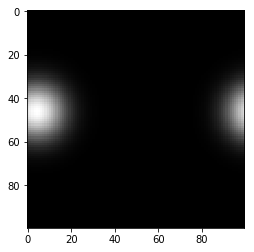

In [11]:
plt.imshow(fs[100], cmap='gray')

In [12]:
imageio.mimsave('images.gif', fs)